# Regressão 01 - tarefa 03 - transformações em X e Y

In [243]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from seaborn import load_dataset

import patsy

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [244]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip']/(tips['total_bill']-tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07


In [245]:
reg_tip = smf.ols('tip ~ sex + smoker + time + net_bill',data=tips).fit()
tips['res_tip'] = reg_tip.resid
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.64e-20
Time:                        22:12:35   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
reg_tip_f = smf.ols('tip ~ net_bill', data=tips).fit()
tips['res_tip'] = reg_tip_f.resid
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.64e-20
Time:                        22:12:36   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

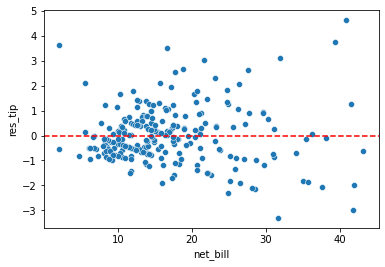

In [247]:
plt.close('all')
sns.scatterplot(x='net_bill', y='res_tip', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.

In [248]:
#log net_bill
reg_tip = smf.ols('tip ~ net_bill + np.log(net_bill)', data=tips).fit()
tips['res_tip'] = reg_tip.resid
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           6.96e-22
Time:                        22:12:36   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             757.3
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.3672      0.822      1.662      0.098      -0.253       2.987
net_bill             0.1005      0.027      3.709      0.000       0.047       0.154
np.log(net_bill)    -0.0206      0.455     -0.045      0.964      -0.917       0.875
==============================================================================
Omnibus:                       33.533   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.043
Skew:                           0.749   Prob(JB):                     1.51e-13
Kurtosis:                       4.887   Cond. No.                         242.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
#polinomio net_bill
reg_tip = smf.ols('tip ~ net_bill + np.power(net_bill,2)', data=tips).fit()
tips['res_tip'] = reg_tip.resid
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           4.96e-22
Time:                        22:12:37   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### O melhor é o polinômio pois possui o R² e o R² ajustado maiores

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [250]:
y,X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', data=tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [251]:
y

DesignMatrix with shape (244, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
      1.54969
      0.69315
      1.13783
      0.67294
      1.17248
      0.53649
      1.60944
      0.45108
      1.09861
      1.10526
      1.36609
      0.51282
      1.31103
      1.25276
      1.20896
      1.40610
      1.01160
      0.80200
      2.02551
      1.15688
      0.85015
      0.69315
      0.69315
      1.45862
      1.09861
  [214 rows omitted]
  Terms:
    'np.log(tip)' (column 0)
  (to view full data, use np.asarray(this_obj))

In [252]:
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           1.21e-18
Time:                        22:12:37   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
y,X = patsy.dmatrices('np.log(tip) ~ net_bill', data=tips)
modelo_f = sm.OLS(y,X).fit()
modelo_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           2.60e-21
Time:                        22:12:37   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
tips['res_tip'] = modelo_f.resid

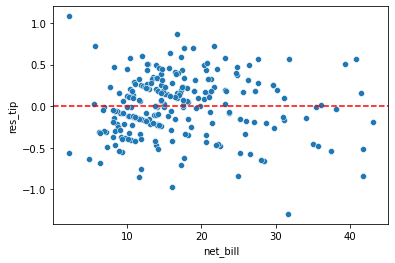

In [255]:
plt.close('all')
sns.scatterplot(x='net_bill', y='res_tip', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

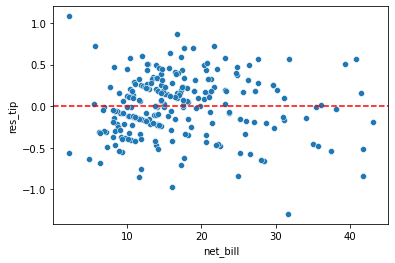

In [256]:
plt.close('all')
sns.scatterplot(x='net_bill', y='res_tip', data=tips)
plt.axhline(y=0, color='r', linestyle='--')

In [257]:
y,X = patsy.dmatrices('tip ~ net_bill + np.log(net_bill)', data=tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           6.96e-22
Time:                        22:12:39   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             757.3
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.3672      0.822      1.662      0.098      -0.253       2.987
net_bill             0.1005      0.027      3.709      0.000       0.047       0.154
np.log(net_bill)    -0.0206      0.455     -0.045      0.964      -0.917       0.875
==============================================================================
Omnibus:                       33.533   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.043
Skew:                           0.749   Prob(JB):                     1.51e-13
Kurtosis:                       4.887   Cond. No.                         242.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
y,X = patsy.dmatrices('tip ~ net_bill + np.power(net_bill,2)', data=tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           4.96e-22
Time:                        22:12:39   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Do modelo final deste item, calcule o  𝑅2 na escala de tip (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [259]:
print(f'R² do Modelo 1:{reg_tip_f.rsquared*100:.2f}%')
print(f'R² do Modelo 1:{modelo_f.rsquared*100:.2f}%')

R² do Modelo 1:33.25%
R² do Modelo 1:31.06%


O melhor modelo de determinação foi o do item 1, pois possui o R² e o R² ajustado maior.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [260]:
df_previsao = pd.read_csv('previsao_de_renda.csv')
df_previsao = df_previsao.drop(['Unnamed: 0'],axis=1)

In [261]:
df_previsao.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [262]:
df_previsao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [263]:
df_dummies = pd.get_dummies(df_previsao, columns=['sexo','posse_de_veiculo','posse_de_imovel','tipo_renda','educacao','estado_civil','tipo_residencia'],drop_first=True)
df_dummies

,data_ref,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,15056,0,26,6.602740,1.0,8060.34,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,2015-01-01,9968,0,28,7.183562,2.0,1852.15,1,1,1,...,0,0,0,0,0,1,0,0,0,0
2,2015-01-01,4312,0,35,0.838356,2.0,2253.89,0,1,1,...,0,0,0,0,0,1,0,0,0,0
3,2015-01-01,10639,1,30,4.846575,3.0,6600.77,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,2015-01-01,7064,0,33,4.293151,1.0,6475.97,1,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,16006,0,48,13.887671,1.0,7990.58,0,0,1,...,0,0,1,0,0,1,0,0,0,0
14996,2016-03-01,3722,0,57,NaN,1.0,10093.45,0,0,1,...,0,0,1,0,0,1,0,0,0,0
14997,2016-03-01,6194,0,45,7.832877,2.0,604.82,0,1,1,...,0,0,0,0,0,1,0,0,0,0
14998,2016-03-01,4922,0,36,4.298630,2.0,3352.27,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [264]:
df_previsao.describe()

,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,12427.000000,15000.000000,15000.000000
mean,8304.871400,0.432333,43.882333,7.722635,2.206400,5697.287057
std,4797.780446,0.746631,11.273155,6.711189,0.909792,8266.816289
min,1.000000,0.000000,22.000000,0.117808,1.000000,118.710000
25%,4181.000000,0.000000,34.000000,2.973973,2.000000,2026.110000
50%,8297.000000,0.000000,43.000000,6.013699,2.000000,3499.720000
75%,12403.000000,1.000000,53.000000,10.120548,3.000000,6392.167500
max,16649.000000,14.000000,68.000000,42.906849,15.000000,245141.670000


In [265]:
df_dummies.corr()

,id_cliente,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
id_cliente,1.000000,0.030296,-0.057812,-0.036373,0.037951,-0.009129,0.023770,-0.012072,-0.102863,-0.039382,...,-0.020730,-0.028308,0.007079,-0.013365,-0.036087,-0.031335,0.023409,0.015588,0.013864,0.024122
qtd_filhos,0.030296,1.000000,-0.360426,-0.063220,0.889777,0.029346,0.122694,0.118690,-0.022738,-0.014188,...,0.026736,-0.015975,-0.118029,-0.002094,-0.105217,-0.015126,0.044441,-0.003657,0.015789,-0.028422
idade,-0.057812,-0.360426,1.000000,0.321573,-0.339320,0.022435,-0.227529,-0.178903,0.140510,0.015471,...,-0.150516,0.052560,-0.067959,-0.058235,0.235861,0.138592,-0.184278,-0.015104,-0.002012,0.034912
tempo_emprego,-0.036373,-0.063220,0.321573,1.000000,-0.065670,0.385013,-0.132896,-0.076155,0.009465,0.011927,...,-0.039925,0.027112,0.001953,-0.013919,0.031188,0.062624,-0.069504,-0.026384,0.016734,0.013136
qt_pessoas_residencia,0.037951,0.889777,-0.339320,-0.065670,1.000000,0.047842,0.166033,0.167240,-0.023415,-0.005559,...,0.021110,-0.225392,-0.408152,0.066820,-0.276143,-0.004687,0.031347,-0.003608,0.018640,-0.024987
renda,-0.009129,0.029346,0.022435,0.385013,0.047842,1.000000,0.285076,0.100493,0.003880,-0.002289,...,-0.021339,-0.011315,-0.024545,-0.027234,-0.051015,0.002860,-0.017231,-0.009513,0.028400,0.004927
sexo_M,0.023770,0.122694,-0.227529,-0.132896,0.166033,0.285076,1.000000,0.358470,-0.059459,-0.017017,...,0.035154,-0.069079,-0.037267,-0.020264,-0.150237,-0.063362,0.060646,0.002564,0.047939,-0.027534
posse_de_veiculo_True,-0.012072,0.118690,-0.178903,-0.076155,0.167240,0.100493,0.358470,1.000000,-0.014172,-0.019619,...,0.011919,-0.082840,-0.073796,-0.047689,-0.098232,-0.027822,0.026563,0.025151,0.034215,-0.015651
posse_de_imovel_True,-0.102863,-0.022738,0.140510,0.009465,-0.023415,0.003880,-0.059459,-0.014172,1.000000,0.016955,...,-0.043280,-0.033593,0.007541,-0.025896,0.047083,0.191634,-0.152185,-0.015906,-0.021366,-0.115544
tipo_renda_Bolsista,-0.039382,-0.014188,0.015471,0.011927,-0.005559,-0.002289,-0.017017,-0.019619,0.016955,1.000000,...,-0.004910,-0.006113,-0.009042,-0.006818,-0.005466,0.008070,-0.005319,-0.001604,-0.001828,-0.004319


In [266]:
df_previsao['tempo_emprego'].describe()

count    12427.000000
mean         7.722635
std          6.711189
min          0.117808
25%          2.973973
50%          6.013699
75%         10.120548
max         42.906849
Name: tempo_emprego, dtype: float64

#### A coluna 'tempo_emprego' não tem uma boa correlação com nenhuma outra coluna. E não coloquei a média pois são muitos dados faltando, aproximadamente 17%, e a distribuição dos valores não é muito simétrica. Com isso a melhor solução vista no momento foi apagar esses dados faltantes.

In [267]:
df_previsao.dropna(inplace=True)

In [268]:
df_previsao.reset_index()

,index,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12422,14994,2016-03-01,11477,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
12423,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
12424,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
12425,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [269]:
df_previsao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12427 non-null  object 
 1   id_cliente             12427 non-null  int64  
 2   sexo                   12427 non-null  object 
 3   posse_de_veiculo       12427 non-null  bool   
 4   posse_de_imovel        12427 non-null  bool   
 5   qtd_filhos             12427 non-null  int64  
 6   tipo_renda             12427 non-null  object 
 7   educacao               12427 non-null  object 
 8   estado_civil           12427 non-null  object 
 9   tipo_residencia        12427 non-null  object 
 10  idade                  12427 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  12427 non-null  float64
 13  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [270]:
reg_renda_simples = smf.ols('renda ~ tempo_emprego', data=df_previsao).fit()
df_previsao['res_renda_simples'] = reg_renda_simples.resid
reg_renda_simples.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:12:42   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

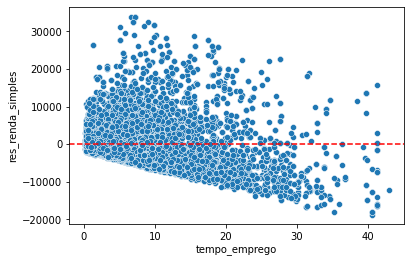

In [271]:
plt.close('all')
sns.scatterplot(x='tempo_emprego',y='res_renda_simples',data=df_previsao[df_previsao['renda']<40000])
plt.axhline(y=0, color='r', linestyle='--')

In [272]:
reg_renda_2 = smf.ols('np.log(renda) ~ tempo_emprego', data=df_previsao[df_previsao['renda']<40000]).fit()
df_previsao['reg_renda_2'] = reg_renda_2.resid
reg_renda_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2044.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:12:43   Log-Likelihood:                -14610.
No. Observations:               12297   AIC:                         2.922e+04
Df Residuals:                   12295   BIC:                         2.924e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8620      0.011    717.102      0.000       7.841       7.884
tempo_emprego     0.0495      0.001     45.209      0.000       0.047       0.052
==============================================================================
Omnibus:                       29.637   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.122
Skew:                           0.025   Prob(JB):                     5.78e-06
Kurtosis:                       2.789   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

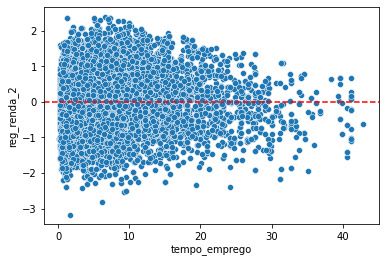

In [273]:
plt.close('all')
sns.scatterplot(x='tempo_emprego',y='reg_renda_2',data=df_previsao[df_previsao['renda']<40000])
plt.axhline(y=0, color='r', linestyle='--')

#### Comparando reg_renda_2 com o reg_renda_simples percebesse que o R² diminui, porem o std err melhora significamente, fazendo com que reg_renda_2 seja melhor para análise.

### Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

In [274]:
reg_renda_3 = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df_previsao).fit()
df_previsao['res_renda_3'] = reg_renda_3.resid
reg_renda_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:12:44   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.5847      0.235     28.006      0.000       6.124       7.046
sexo[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
posse_de_veiculo[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
posse_de_imovel[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
tipo_renda[T.Bolsista]               0.2209      0.241      0.916      0.360      -0.252       0.694
tipo_renda[T.Empresário]             0.1551      0.015     10.387      0.000       0.126       0.184
tipo_renda[T.Pensionista]           -0.3087      0.241     -1.280      0.201      -0.782       0.164
tipo_renda[T.Servidor público]       0.0576      0.022      2.591      0.010       0.014       0.101
educacao[T.Pós graduação]            0.1071      0.159      0.673      0.501      -0.205       0.419
educacao[T.Secundário]              -0.0141      0.072     -0.196      0.844      -0.155       0.127
educacao[T.Superior completo]        0.0938      0.072      1.298      0.194      -0.048       0.235
educacao[T.Superior incompleto]     -0.0432      0.078     -0.555      0.579      -0.196       0.109
estado_civil[T.Separado]             0.3265      0.111      2.935      0.003       0.108       0.545
estado_civil[T.Solteiro]             0.2672      0.109      2.453      0.014       0.054       0.481
estado_civil[T.União]               -0.0343      0.025     -1.361      0.174      -0.084       0.015
estado_civil[T.Viúvo]                0.3689      0.116      3.191      0.001       0.142       0.596
tipo_residencia[T.Casa]             -0.0442      0.054     -0.815      0.415      -0.150       0.062
tipo_residencia[T.Com os pais]      -0.0258      0.060     -0.427      0.670      -0.144       0.093
tipo_residencia[T.Comunitário]      -0.1196      0.105     -1.135      0.256      -0.326       0.087
tipo_residencia[T.Estúdio]           0.0665      0.099      0.670      0.503      -0.128       0.261
tipo_residencia[T.Governamental]    -0.0571      0.066     -0.865      0.387      -0.186       0.072
qtd_filhos                          -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego                        0.0617      0.001     59.398      0.000       0.060       0.064
qt_pessoas_residencia                0.2926      0.108      2.716      0.007       0.081       0.504
==============================================================================
Omnibus:                        0.858   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.839
Skew:             

### Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [275]:
reg_renda_4 = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + estado_civil + idade + tempo_emprego + qt_pessoas_residencia', data=df_previsao).fit()
df_previsao['res_renda_4'] = reg_renda_4.resid
reg_renda_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     453.1
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:12:44   Log-Likelihood:                -13603.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12411   BIC:                         2.736e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          6.5951      0.219     30.152      0.000       6.166       7.024
sexo[T.M]                          0.7819      0.015     53.480      0.000       0.753       0.811
posse_de_veiculo[T.True]           0.0535      0.014      3.789      0.000       0.026       0.081
posse_de_imovel[T.True]            0.0848      0.014      6.172      0.000       0.058       0.112
tipo_renda[T.Bolsista]             0.2998      0.242      1.241      0.215      -0.174       0.773
tipo_renda[T.Empresário]           0.1655      0.015     11.120      0.000       0.136       0.195
tipo_renda[T.Pensionista]         -0.2540      0.242     -1.051      0.293      -0.728       0.220
tipo_renda[T.Servidor público]     0.0769      0.022      3.472      0.001       0.033       0.120
estado_civil[T.Separado]           0.3241      0.112      2.907      0.004       0.106       0.543
estado_civil[T.Solteiro]           0.2623      0.109      2.403      0.016       0.048       0.476
estado_civil[T.União]             -0.0361      0.025     -1.431      0.153      -0.086       0.013
estado_civil[T.Viúvo]              0.3588      0.116      3.097      0.002       0.132       0.586
qtd_filhos                        -0.2560      0.108     -2.366      0.018      -0.468      -0.044
idade                              0.0048      0.001      6.147      0.000       0.003       0.006
tempo_emprego                      0.0617      0.001     59.407      0.000       0.060       0.064
qt_pessoas_residencia              0.2839      0.108      2.629      0.009       0.072       0.496
==============================================================================
Omnibus:                        1.149   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                1.121
Skew:                           0.021   Prob(JB):                        0.571
Kurtosis:                       3.019   Cond. No.                     2.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R²
- As variáveis explicam 35,4% da renda.

#### F-statistic
- O valor aumentou significativamente comparado com o reg_renda_3, com isso percebe-se que o modelo se torna mais significativo,

#### P > |T|
- A maioria dos valores p são menores que 0.05, indicando que a variável tem um efeito significativo sobre a variável dependente.

#### idade e tempo_emprego
- Percebe-se que pessoas com maiores idades e com mais tempo de emprego ganham mais, isso normalmente faz sentido dado a circunstância de que uma pessoa mais velha geralmente tem mais experiência no mercado de trabalho e uma pessoa com mais tempo de emprego geralmente recebe mais pelo seu conhecimento.

#### intercept
- quando todas as variáveis independentes forem 0, o valor da renda vai ser igual a 6.59, mas não faz sentido porque uma pessoa com idade 0, normalmente não tem renda, então devemos considerar esse valor um ponto de referência teórico.

### Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [276]:
df_previsao.columns

Index(['data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'res_renda_simples', 'reg_renda_2', 'res_renda_3',
       'res_renda_4'],
      dtype='object')

In [277]:
def scatter(x,y):
    sns.scatterplot(x=x, y=y,data=df_previsao)
    plt.axhline(y=0, color='r', linestyle='--')
    return

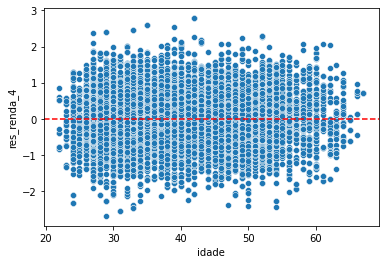

In [278]:
scatter('idade', 'res_renda_4')

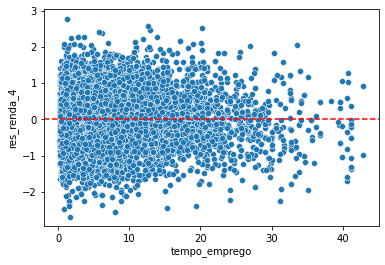

In [279]:
scatter('tempo_emprego', 'res_renda_4')

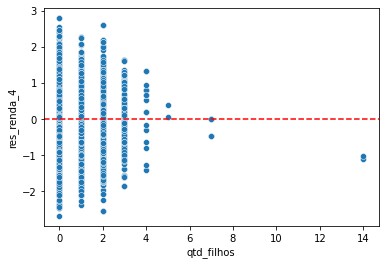

In [280]:
scatter('qtd_filhos','res_renda_4')

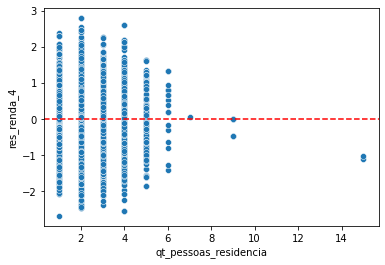

In [281]:
scatter('qt_pessoas_residencia','res_renda_4')

In [282]:
def box(x,y):
    sns.boxplot(x=x, y=y, data=df_previsao)
    return

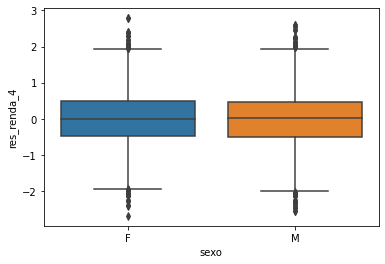

In [283]:
box('sexo','res_renda_4')

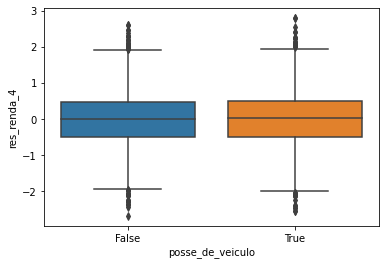

In [284]:
box('posse_de_veiculo', 'res_renda_4')

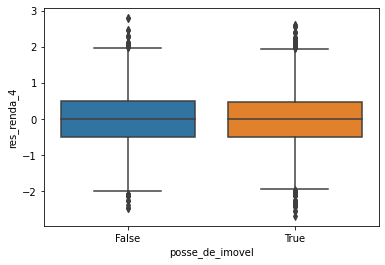

In [285]:
box('posse_de_imovel','res_renda_4')

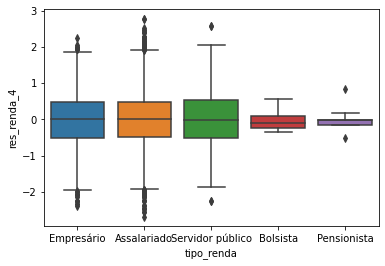

In [286]:
box('tipo_renda', 'res_renda_4')

<AxesSubplot:xlabel='tipo_renda', ylabel='renda'>

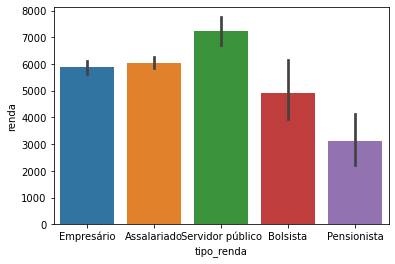

In [287]:
sns.barplot(x='tipo_renda', y='renda', data=df_previsao)

#### Com esse boxplot nota-se que a renda do Bolsista e do Pensionista tem uma variação baixa e tem menos outliers, e isso faz sentido dado em conta que geralmente são rendas menores.

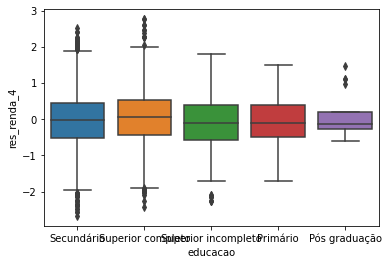

In [288]:
box('educacao', 'res_renda_4')

<AxesSubplot:xlabel='educacao', ylabel='renda'>

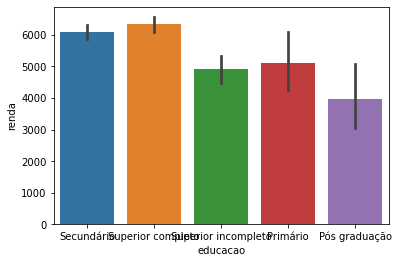

In [289]:
sns.barplot(x='educacao', y='renda', data=df_previsao)

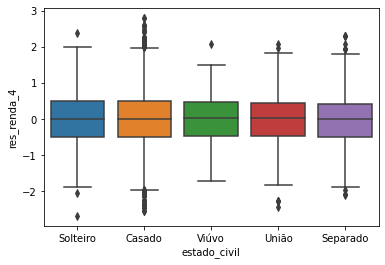

In [290]:
box('estado_civil', 'res_renda_4')

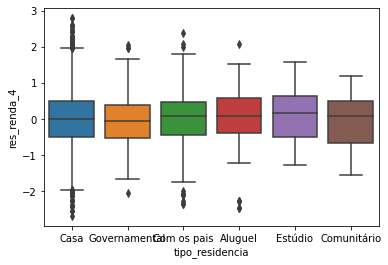

In [291]:
box('tipo_residencia','res_renda_4')